In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import re
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Using TensorFlow backend.


In [2]:
os.listdir(path='.')
listOfFile = os.listdir("./color")
x=len(listOfFile)
for i in range(0,x):
    print(listOfFile[i])

Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites_Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus


Working with 18160 images
Image examples: 
./color/Tomato___Bacterial_spot/05fc994d-7781-4dc5-a15c-b359f6c681a6___GCREC_Bact.Sp 6304.JPG


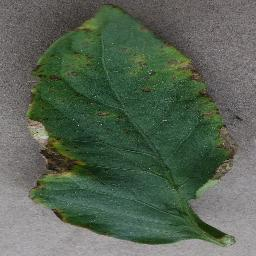

In [3]:
onlyfiles=[]
x=len(listOfFile)
for i in range(0,x):
    folder="./color/"+listOfFile[i]
    print
    onlyfiles2 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
    for t in range(0, len(onlyfiles2)):
        onlyfiles.append(folder+"/"+onlyfiles2[t])
#onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")
for i in range(41, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=onlyfiles[i], width=256, height=256))

In [4]:
train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    r1 = re.search(r".+/", _file)
    #label_in_file = _file.find("_")
    y_train.append(r1.group())
    i=i+1
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 256
image_height = 256
ratio = 4

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(_file)  # this is a PIL image   #listoffile yerinde folder vardı  listOfFile[i] + "/" +
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((3, 64, 64))
    # Normalize
    #x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 3000 == 0:
        print("%d images to array" % i)
print("All images to array!")

Files in train_files: 18160
3000 images to array
6000 images to array
9000 images to array
12000 images to array
15000 images to array
18000 images to array
All images to array!


# normalization and splitting

In [5]:
# Normalize the data
from keras.utils import to_categorical
y_train = pd.Categorical(y_train).codes
dataset = dataset / 255.0
y_train = y_train / 255.0
print("dataset shape: ",dataset.shape)
print("y_train shape: ",y_train.shape)

dataset shape:  (18160, 3, 64, 64)
y_train shape:  (18160,)


In [9]:
#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=0.2, random_state=33)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (14528, 3, 64, 64)
x test:  (3632, 3, 64, 64)
y train:  (14528,)
y test:  (3632,)


In [10]:
#reshape data to fit model
x_train = X_train.reshape(14528,64,64,3)
x_test = X_test.reshape(3632,64,64,3)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)

y_train = pd.Categorical(y_train).codes
y_test = pd.Categorical(y_test).codes

x train:  (14528, 64, 64, 3)
x test:  (3632, 64, 64, 3)


In [11]:
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]
print(number_of_train,number_of_test)

x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

14528 3632
X train flatten (14528, 12288)
X test flatten (3632, 12288)
x train:  (12288, 14528)
x test:  (12288, 3632)
y train:  (14528,)
y test:  (3632,)


In [12]:
x_train=x_train.T
x_test=x_test.T

In [13]:
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (14528, 12288)
x test:  (3632, 12288)
y train:  (14528,)
y test:  (3632,)


# knn model and accuracy

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
model.fit(x_train,y_train)
#Predict Output
predicted= model.predict(x_test) 
print(metrics.accuracy_score(y_test, predicted))
#print(predicted)